Instalaremos las bibliotecas

In [ ]:

pip install pandas
pip install openpyxl
pip install matplotlib



##Tirar codigo en la terminal para instalar las bibliotecas

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ruta del archivo Excel
file_path = r'C:\Users\aldri\OneDrive\Escritorio\Analisis\bd\AirQualityUCI.xlsx'

# Leer la hoja de cálculo
df = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


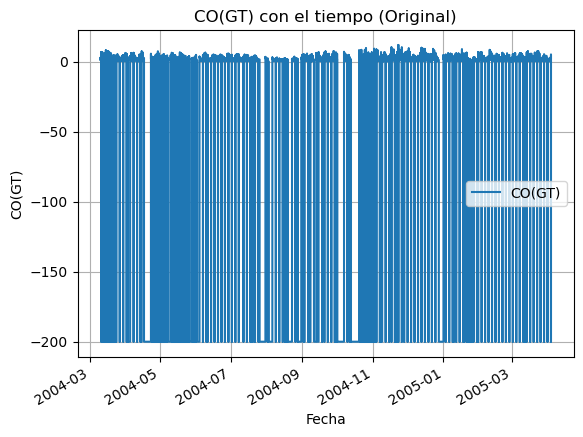

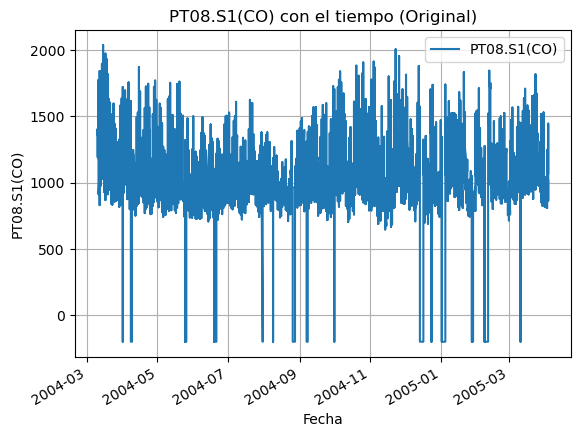

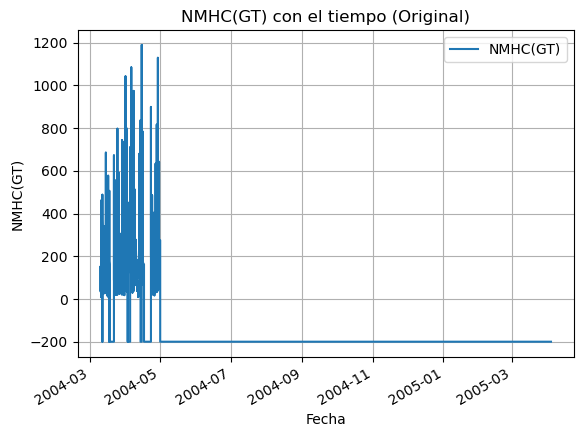

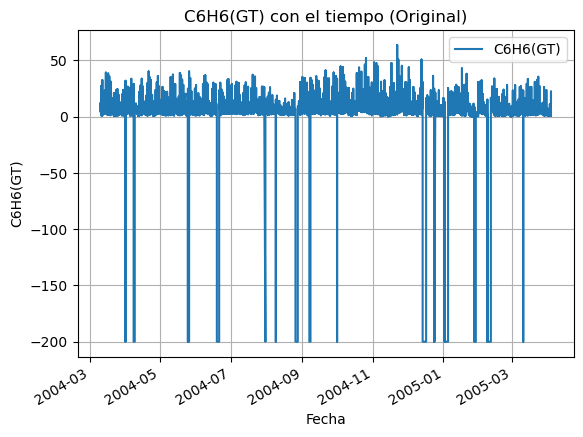

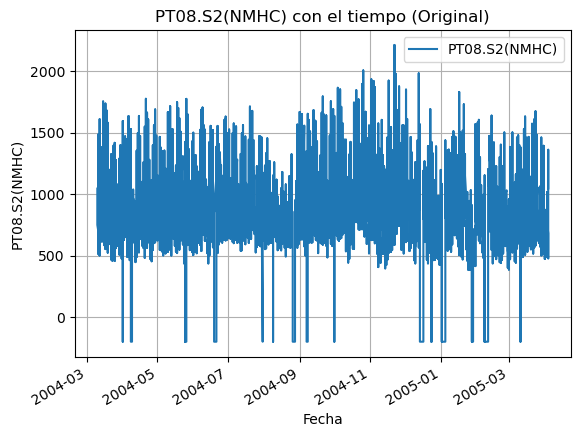

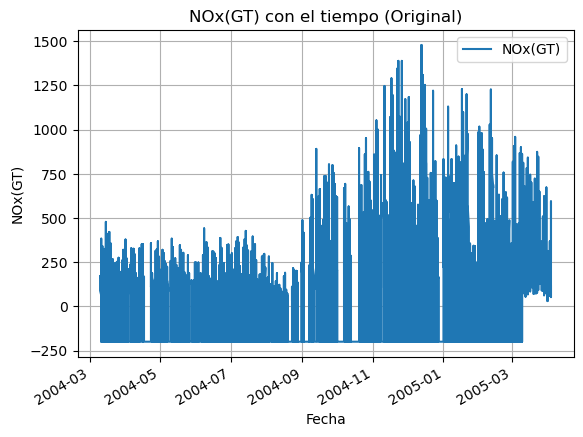

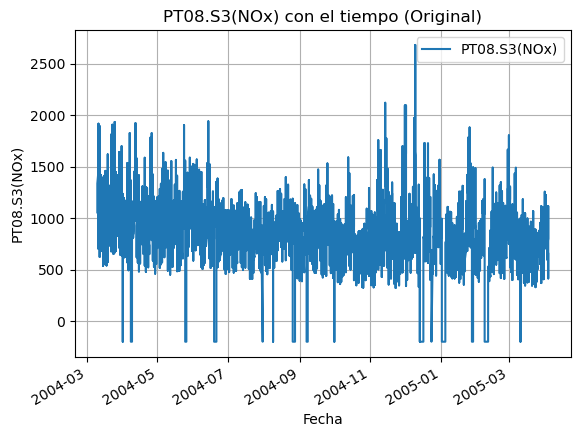

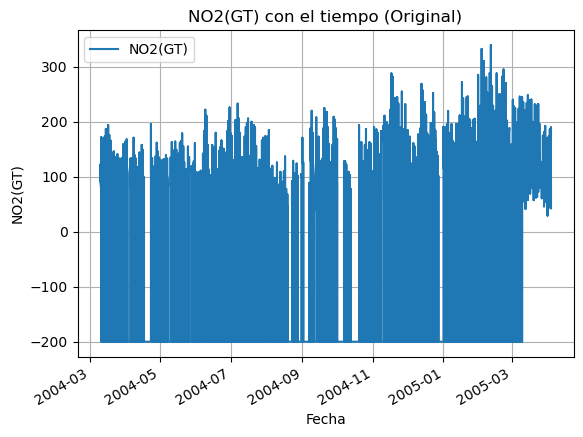

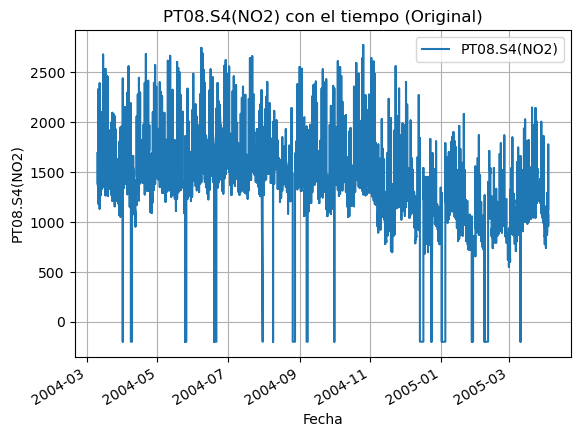

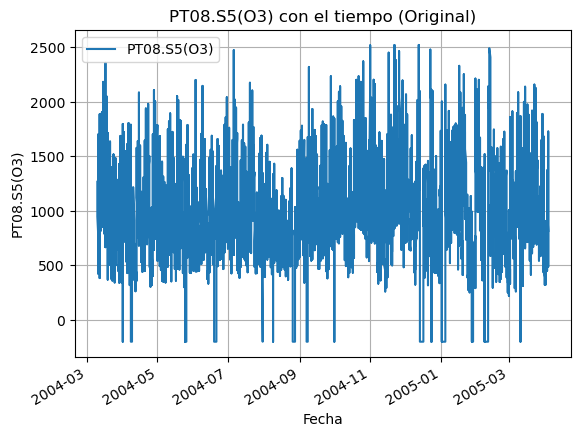

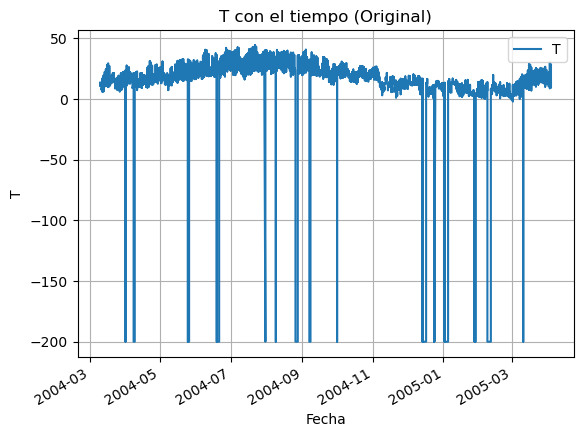

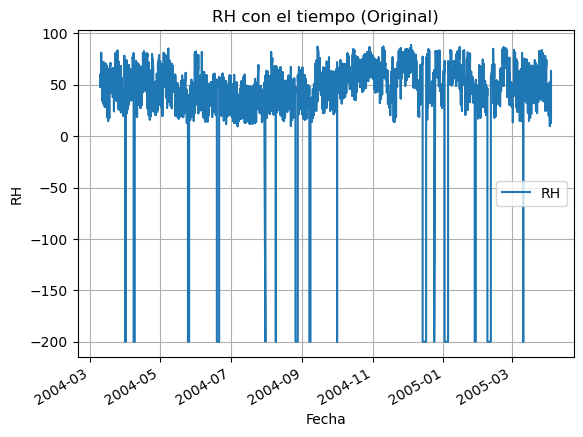

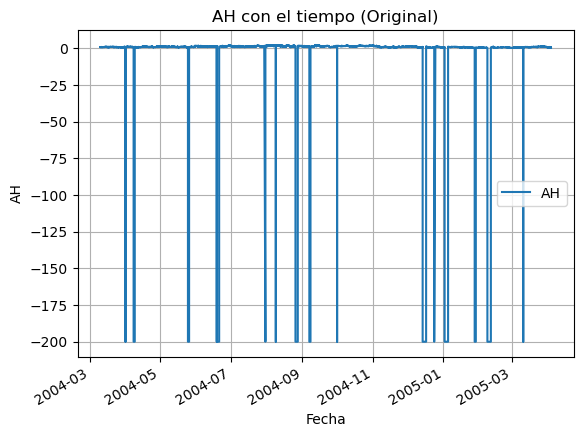

In [62]:
# Asegurarse de que la columna 'Date' esté en formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Lista de columnas para graficar
columns_to_plot = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

# Graficar las columnas del DataFrame original
for column in columns_to_plot:
    df.plot(x='Date', y=column, kind='line')
    
    # Configurar título y etiquetas de la gráfica
    plt.title(f'{column} con el tiempo (Original)')
    plt.xlabel('Fecha')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [63]:
# Guardar una copia del DataFrame original
df_original = df.copy()


# Calcular los promedios de las columnas, excluyendo 'Date' y 'Time'
promedios_original = df_original.drop(columns=['Date', 'Time']).mean()

# Columnas a las que se les pueden agregar valores nulos
columns_to_modify = df.columns.difference(['Date', 'Time'])

# Añadir valores nulos aleatorios a las columnas seleccionadas
np.random.seed(0)  # Para reproducibilidad
for column in columns_to_modify:
    # Determinar el número de valores a reemplazar por nulos
    n_nulls = int(0.3 * len(df))  # Por ejemplo, el 10% de los valores
    null_indices = np.random.choice(df.index, n_nulls, replace=False)
    df.loc[null_indices, column] = np.nan

# Mostrar las primeras filas del DataFrame con valores nulos
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,NaN,11.881723,1045.50,166.0,1056.25,113.0,1692.00,NaN,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,NaN,NaN,NaN,954.75,NaN,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,NaN,8.997817,939.25,131.0,1140.00,114.0,NaN,1074.00,11.9,53.975000,0.750239
3,2004-03-10,21:00:00,NaN,1375.50,80.0,9.228796,NaN,NaN,1092.00,NaN,1583.75,1203.25,11.0,60.000000,0.786713
4,2004-03-10,22:00:00,NaN,1272.25,51.0,6.518224,835.50,NaN,NaN,NaN,NaN,NaN,NaN,59.575001,0.788794


In [64]:
# Convertir columnas de tipo 'object' a tipos más específicos
df_interpolated = df.copy()
df_interpolated = df_interpolated.infer_objects()

# Realizar la interpolación sencilla
df_interpolated = df_interpolated.interpolate()

# Asegurarse de que los NaN se han reemplazado usando 'ffill' y 'bfill'
df_interpolated = df_interpolated.ffill().bfill()

# Mostrar las primeras filas del DataFrame interpolado
df_interpolated.head()





C:\Users\aldri\AppData\Local\Temp\ipykernel_12388\2169745421.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_interpolated.interpolate()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.600000,1360.00,80.0,11.881723,1045.500,166.0,1056.25,113.00,1692.000000,972.25,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.000000,1381.00,80.0,10.439770,954.750,148.5,1173.75,92.00,1558.750000,972.25,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.200000,1402.00,80.0,8.997817,939.250,131.0,1140.00,114.00,1571.250000,1074.00,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,1.866667,1375.50,80.0,9.228796,887.375,117.0,1092.00,104.75,1583.750000,1203.25,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.533333,1272.25,51.0,6.518224,835.500,103.0,1214.25,95.50,1500.083333,1076.25,11.108333,59.575001,0.788794


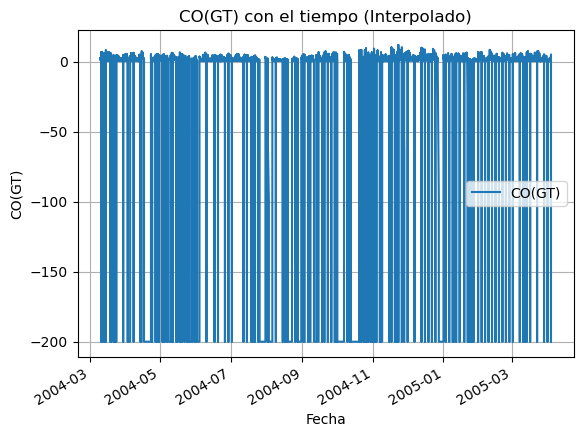

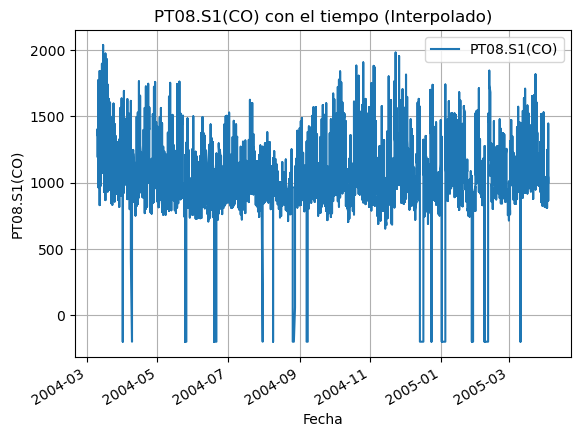

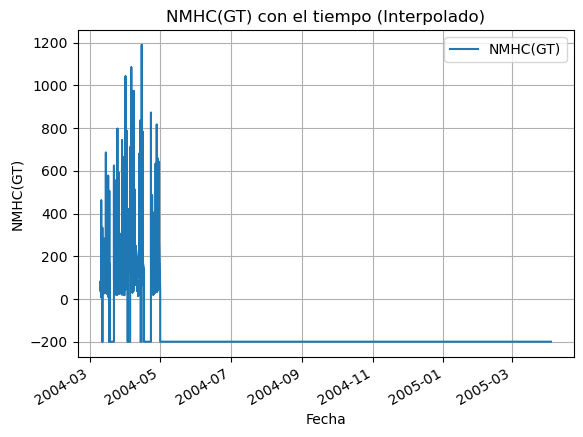

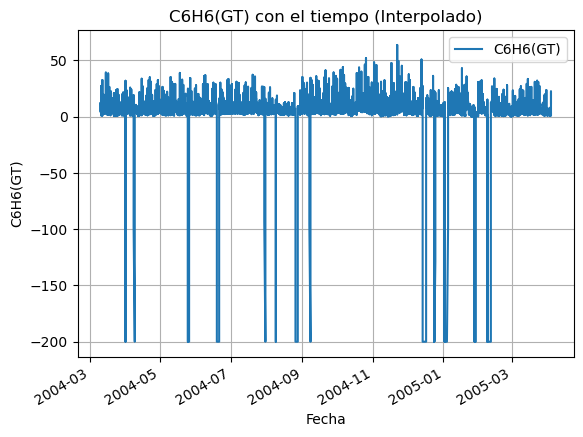

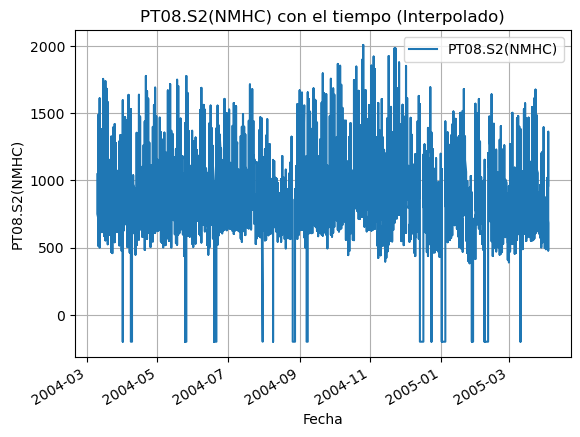

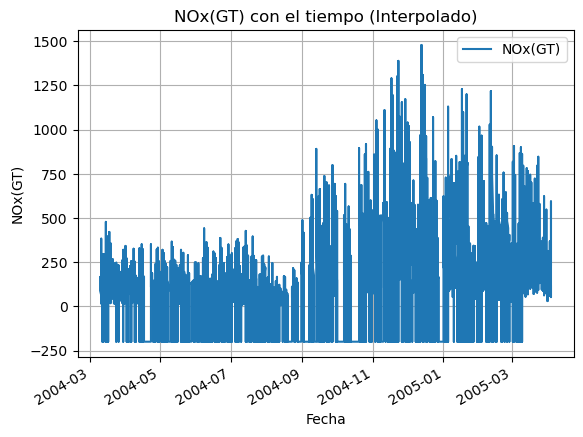

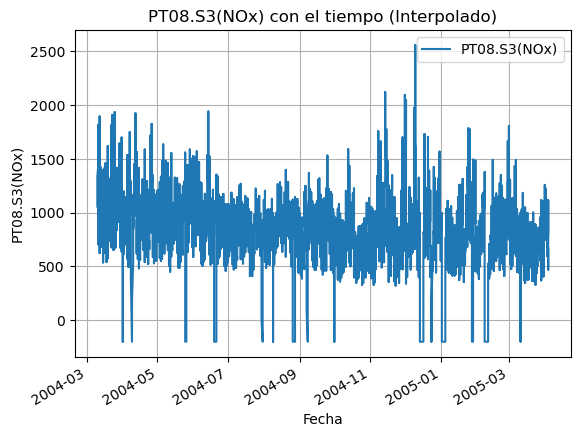

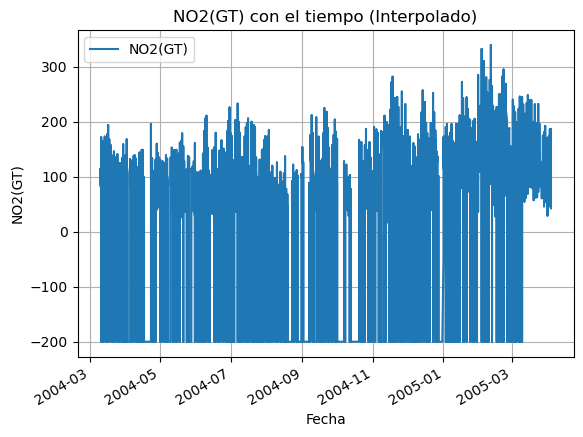

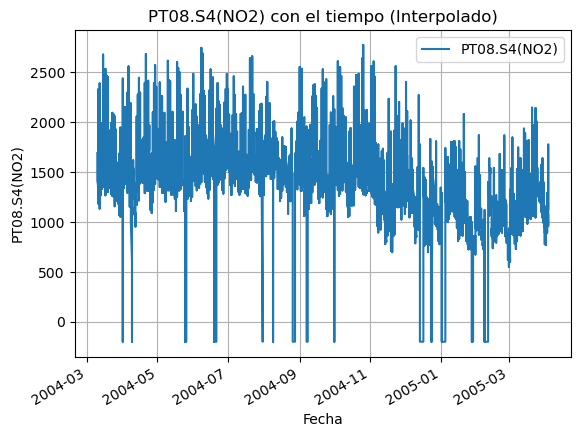

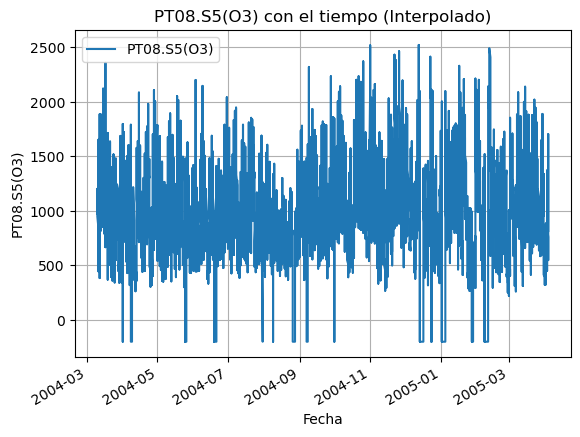

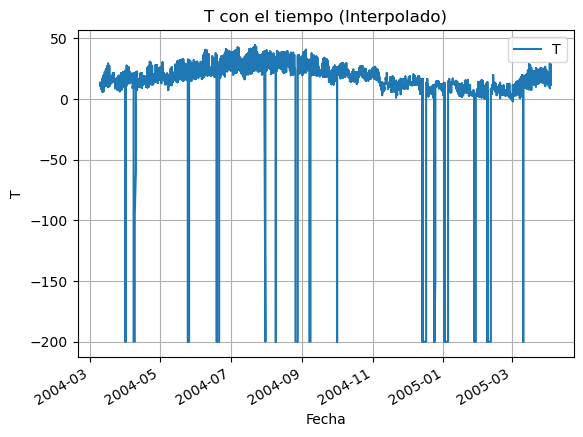

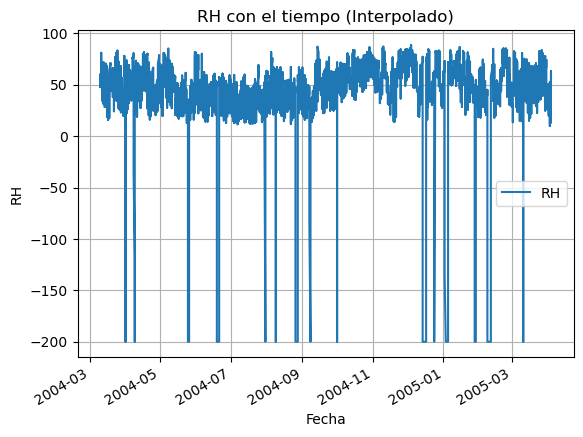

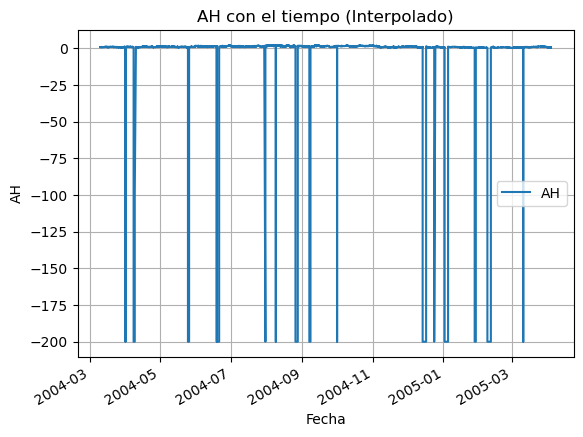

In [65]:
# Graficar las columnas interpoladas
for column in columns_to_plot:
    df_interpolated.plot(x='Date', y=column, kind='line')
    
    # Configurar título y etiquetas de la gráfica
    plt.title(f'{column} con el tiempo (Interpolado)')
    plt.xlabel('Fecha')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


In [66]:
# Calcular la suma de los promedios del DataFrame original
suma_promedios_original = promedios_original.sum()

# Calcular la suma de los promedios del DataFrame interpolado
suma_promedios_interpolated = promedios_interpolated.sum() # type: ignore

# Calcular la precisión general como porcentaje
precision_global = 100 * (1 - abs(suma_promedios_original - suma_promedios_interpolated) / suma_promedios_original)

# Mostrar la precisión global
print(f"Precisión del modelo interpolados: {precision_global:.2f}%")



Precisión del modelo interpolados: 99.97%


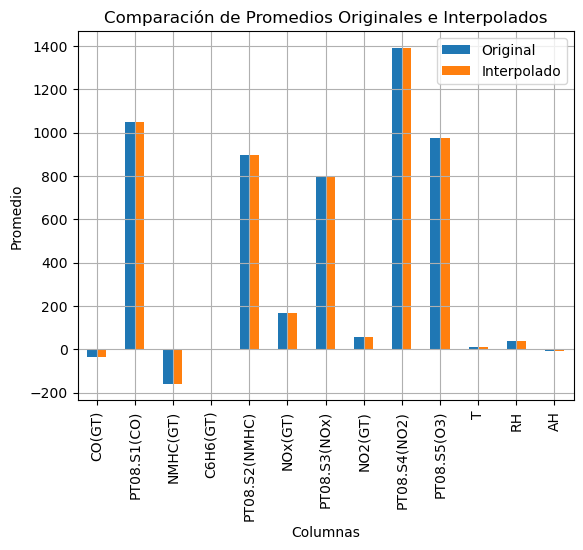

In [67]:
# Comparar los promedios originales e interpolados visualmente
df_comparison = pd.DataFrame({'Original': promedios_original, 'Interpolado': promedios_interpolated})

# Graficar la comparación
df_comparison.plot(kind='bar')
plt.title('Comparación de Promedios Originales e Interpolados')
plt.xlabel('Columnas')
plt.ylabel('Promedio')
plt.grid(True)
plt.show()
